In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, GlobalAveragePooling2D, Conv2D, Input, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1,validation_split = 0.2)
path = 'C:/Users/Siva/Documents/VideoAnalytics/data/home'
train_generator = train_datagen.flow_from_directory(path,
                        target_size = (224,224),
                        batch_size = 32,
                        class_mode ="categorical",
                        subset = "training")
val = train_datagen.flow_from_directory(path,
                        target_size = (224,224),
                        batch_size = 32,
                        class_mode ="categorical",
                            subset = "validation")

Found 3658 images belonging to 2 classes.
Found 914 images belonging to 2 classes.


In [7]:
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input,output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [3]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')


In [4]:
output = mobilenet.layers[-1].output
output = keras.layers.Flatten()(output)
mbnet = Model(mobilenet.input,output)
for layer in mbnet.layers:
    layer.trainable = False
mbnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [5]:
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(mbnet)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 50176)             3228864   
                                                                 
 dense (Dense)               (None, 512)               25690624  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [10]:
model.compile(loss='binary_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')

In [11]:
history = model.fit(train_generator,validation_data=val, batch_size = 32, epochs = 5, verbose = 1)

Epoch 1/5
115/115 [==============================] - 188s 2s/step - loss: 1.5405 - accuracy: 0.5000 - val_loss: 0.7043 - val_accuracy: 0.5000
Epoch 2/5
115/115 [==============================] - 178s 2s/step - loss: 0.7136 - accuracy: 0.5000 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 3/5
115/115 [==============================] - 177s 2s/step - loss: 0.6986 - accuracy: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 4/5
115/115 [==============================] - 174s 1s/step - loss: 0.6963 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 5/5
115/115 [==============================] - 179s 2s/step - loss: 0.6943 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000


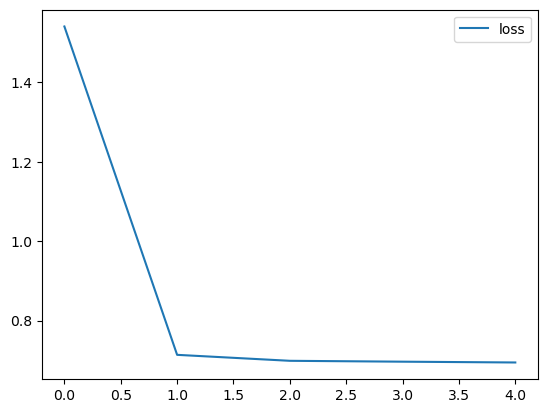

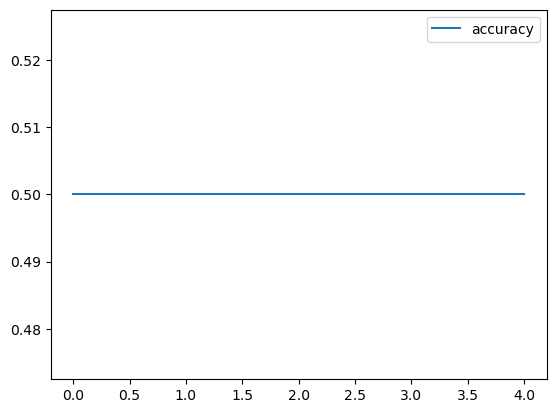

In [15]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.legend(['loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'],loc='upper right')
plt.show()

In [50]:
val_loss = [1.8847, 1.7406, 2.3394, 2.9607, 0.8618]
val_acc = [0.8370, 0.8348, 0.8260, 0.7254, 0.9081]
epochs = [1,2,3,4,5]

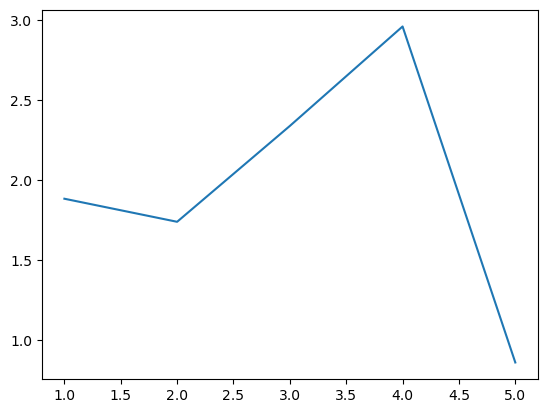

In [51]:
plt.plot(epochs, val_loss)

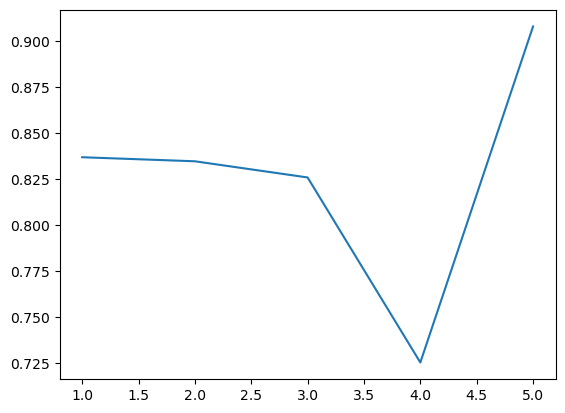

In [52]:
plt.plot(epochs,val_acc)

In [14]:
model.save('mobnet_model_3.h5')

In [ ]:
from matplotlib import pyplot as plt